In [1]:
# Visualización y limpieza de datos
# =====================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from math import pi

# Gráficos
# =====================================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Deshabilitar advertencias
# =====================================================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuramos Matplotlib
# =====================================================================================================
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

In [3]:
# Visualizar los primeros índices
load = pd.read_csv('mercado.csv', sep = ',')
df = pd.DataFrame(load)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
# Describimos las columnas
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [5]:
# No sabemos cómo interpretar el valor 'MntGoldProds' por lo que desistimos de esos valores
df = df.drop(['MntGoldProds'], axis = 1)

In [6]:
# Verificamos las columnas
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')

In [7]:
# Cambiamos el nombre para que sean más descriptivas
# =====================================================================================================
# Dejaré el Mnt igual debido a que es el Medical nutrition therapy es decir la nutriología
df.columns = ['identificador', 'nacimiento', 'educación', 'estado_civil',
              'ingresos', 'hogar_infantil', 'hogar_adolescente', 'fecha_afiliado',
              'recencia', 'Mnt_Vinos', 'Mnt_Frutas', 'Mnt_Carnes', 'Mnt_Pescado',
              'Mnt_Dulces', 'Compra_ofertas', 'Compra_web', 'Compra_catálogo',
              'Compra_tienda', 'Visitas_web_mensual', 'respuestas', 'quejas']

In [8]:
# Revisamos los cambios
df.head()

,identificador,nacimiento,educación,estado_civil,ingresos,hogar_infantil,hogar_adolescente,fecha_afiliado,recencia,Mnt_Vinos,...,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual,respuestas,quejas
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,379,111,189,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,64,7,0,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,59,15,2,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,24,11,0,2,3,1,2,7,1,0


In [9]:
# Eliminamos datos como el identificador debido a que haremos un modelo Collaborative filtering
# https://en.wikipedia.org/wiki/Collaborative_filtering
df = df.drop(['identificador'], axis = 1)

In [10]:
# Analizamos las columnas
# En pandas, el "object64" se refiere a un dato tipo string
df.info()
# Nos percatamos que en ingresos hay 24 valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nacimiento           2240 non-null   int64  
 1   educación            2240 non-null   object 
 2   estado_civil         2240 non-null   object 
 3   ingresos             2216 non-null   float64
 4   hogar_infantil       2240 non-null   int64  
 5   hogar_adolescente    2240 non-null   int64  
 6   fecha_afiliado       2240 non-null   object 
 7   recencia             2240 non-null   int64  
 8   Mnt_Vinos            2240 non-null   int64  
 9   Mnt_Frutas           2240 non-null   int64  
 10  Mnt_Carnes           2240 non-null   int64  
 11  Mnt_Pescado          2240 non-null   int64  
 12  Mnt_Dulces           2240 non-null   int64  
 13  Compra_ofertas       2240 non-null   int64  
 14  Compra_web           2240 non-null   int64  
 15  Compra_catálogo      2240 non-null   i

In [11]:
# Revisamos nuevamente
print(df.isnull().sum())

nacimiento              0
educación               0
estado_civil            0
ingresos               24
hogar_infantil          0
hogar_adolescente       0
fecha_afiliado          0
recencia                0
Mnt_Vinos               0
Mnt_Frutas              0
Mnt_Carnes              0
Mnt_Pescado             0
Mnt_Dulces              0
Compra_ofertas          0
Compra_web              0
Compra_catálogo         0
Compra_tienda           0
Visitas_web_mensual     0
respuestas              0
quejas                  0
dtype: int64


In [12]:
# Haremos carpintería
# =====================================================================================================

angst = df.dropna(axis=0, how='any') # Limpiando los valores nulos
# angst es solo una variable temporal para sacar el promedio excluyendo datos nulos
# la llamé así porque estaba escuchando Rammstein
print(f"{angst.isnull().sum()} \n \n {angst.shape}") # Volvemos a ver la magnitud

nacimiento             0
educación              0
estado_civil           0
ingresos               0
hogar_infantil         0
hogar_adolescente      0
fecha_afiliado         0
recencia               0
Mnt_Vinos              0
Mnt_Frutas             0
Mnt_Carnes             0
Mnt_Pescado            0
Mnt_Dulces             0
Compra_ofertas         0
Compra_web             0
Compra_catálogo        0
Compra_tienda          0
Visitas_web_mensual    0
respuestas             0
quejas                 0
dtype: int64 
 
 (2216, 20)


In [13]:
# Revisamos de haber eliminado los valore nulos
angst['ingresos'].shape

(2216,)

In [14]:
# Sacamos el promedio del ingreso
angst['ingresos'].mean()

52247.25135379061

In [15]:
# Utilizamos nuestro promediado anterior para aplicarlo a los datos nulos
# Y para ello utilizaremos el df original y desechamos el angst
df['ingresos'] = df['ingresos'].fillna(52247)

In [16]:
# Ningún valor nulo en todo el Dataframe🥶
print(f"{df.isnull().sum()} \n \n {df.shape}")

nacimiento             0
educación              0
estado_civil           0
ingresos               0
hogar_infantil         0
hogar_adolescente      0
fecha_afiliado         0
recencia               0
Mnt_Vinos              0
Mnt_Frutas             0
Mnt_Carnes             0
Mnt_Pescado            0
Mnt_Dulces             0
Compra_ofertas         0
Compra_web             0
Compra_catálogo        0
Compra_tienda          0
Visitas_web_mensual    0
respuestas             0
quejas                 0
dtype: int64 
 
 (2240, 20)


In [62]:
# Variables numéricas
# =====================================================================================================
df.select_dtypes(include = ['float64', 'int']).describe()

,nacimiento,ingresos,hogar_infantil,hogar_adolescente,recencia,Mnt_Vinos,Mnt_Frutas,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual,respuestas,quejas,edad
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,1969.267775,51883.819483,0.450139,0.516620,49.228532,304.311634,26.269621,164.504155,37.296399,27.093721,2.321791,4.071099,2.620960,5.825946,5.308403,0.149123,0.008772,52.732225
std,11.331346,20161.090663,0.538630,0.544933,28.902463,335.843382,39.654353,216.993391,54.344134,41.138789,1.842118,2.667662,2.741673,3.208489,2.294887,0.356292,0.093268,11.331346
min,1947.000000,8028.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,1960.000000,35691.250000,0.000000,0.000000,25.000000,24.000000,1.250000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,44.000000
50%,1970.000000,51650.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,52.000000
75%,1978.000000,68118.000000,1.000000,1.000000,74.000000,502.750000,33.000000,230.000000,49.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,62.000000
max,1996.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1607.000000,259.000000,263.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1.000000,1.000000,75.000000


In [18]:
# Gráfico de distribución para cada variable numérica
# =====================================================================================================
# Ajustar número de subplots en función del número de columnas
def grafica_1(dataframe):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 8))
    axes = axes.flat
    columnas_numeric = dataframe.select_dtypes(include=['float64', 'int']).columns
    columnas_numeric = columnas_numeric.drop('nacimiento')
    
    for i, colum in enumerate(columnas_numeric):
        sns.histplot(
            data    = dataframe,
            x       = colum,
            stat    = "count",
            kde     = True,
            color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws= {'linewidth': 2},
            alpha   = 0.3,
            ax      = axes[i]
        )
        axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
        axes[i].tick_params(labelsize = 6)
        axes[i].set_xlabel("")
        
        
    fig.tight_layout()
    plt.subplots_adjust(top = 0.9)
    fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [19]:
# Definimos una función para realizar múltiples gráfica y le colocamos como parámetro el df
# =====================================================================================================
def plot_digit(dataframe):
    col_name = np.array(dataframe.columns)
    bins = dataframe.shape[0]
    for col in col_name:
        fig, axs = plt.subplots()
        axs.hist(dataframe[col],
                 bins=bins,
                 edgecolor='blue',
                 )
        plt.xlabel('Valores')
        plt.ylabel('Respuestas')
        plt.title(col)
        plt.tight_layout()
        plt.show()

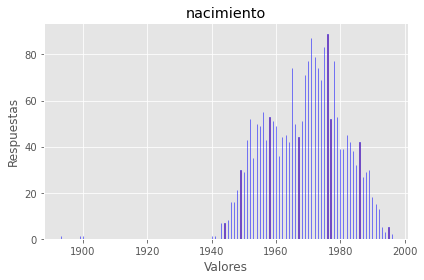

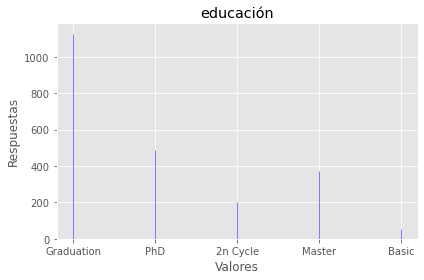

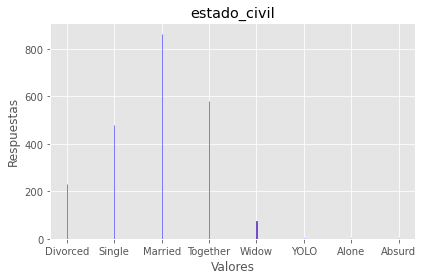

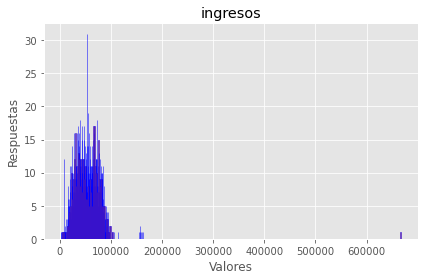

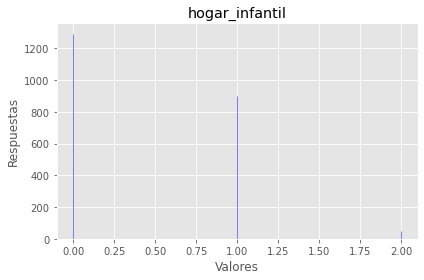

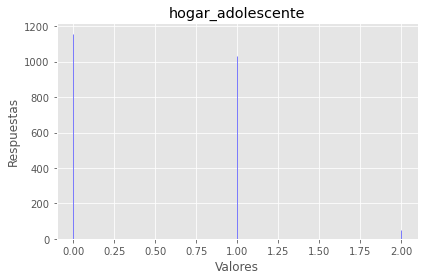

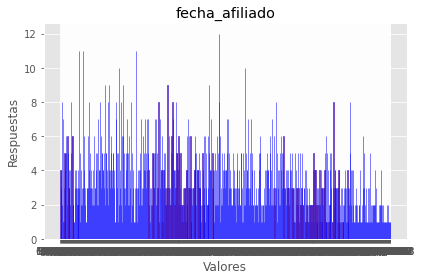

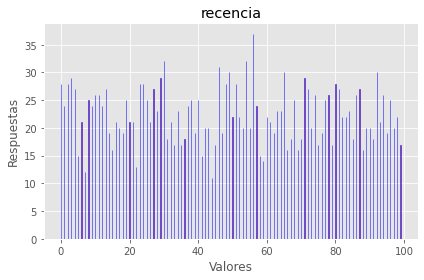

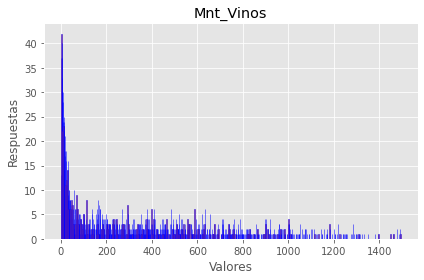

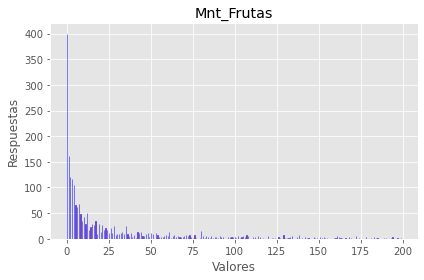

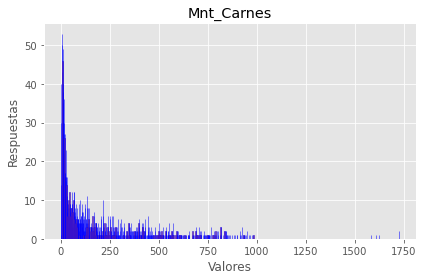

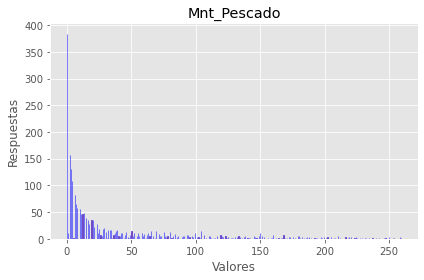

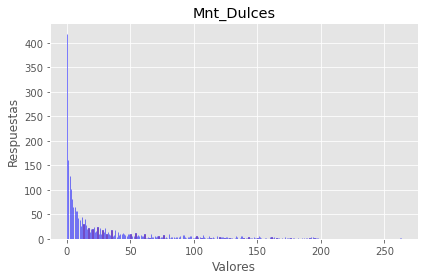

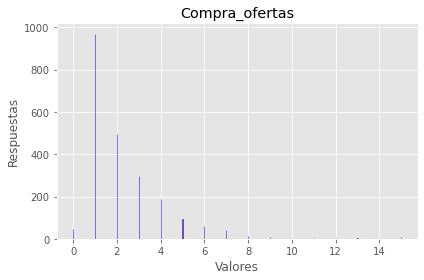

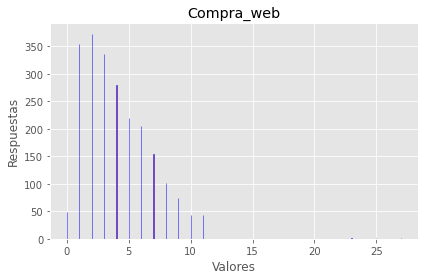

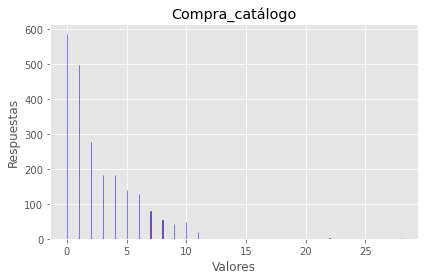

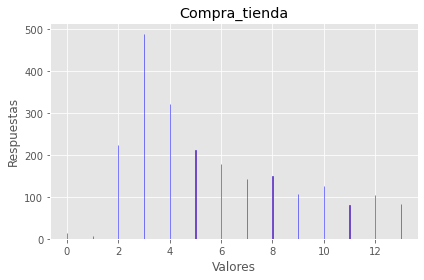

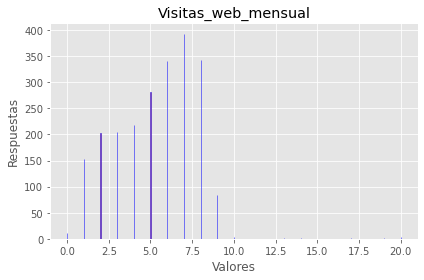

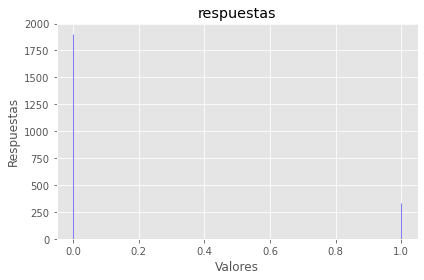

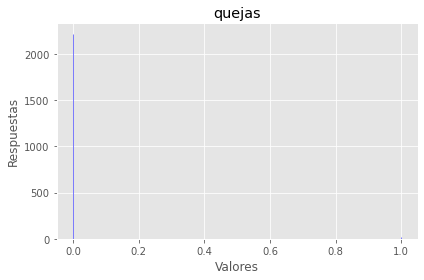

In [20]:
plot_digit(df)

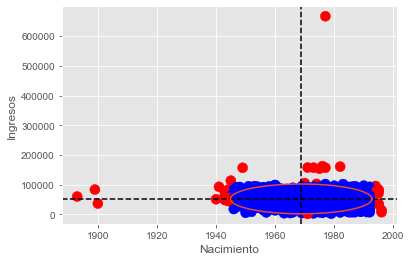

In [22]:
# Hemos detectado outliers gracias a la gráfica, ahora graficaremos enfocado a ello para ajustar
# =====================================================================================================
ingreso = df['ingresos'] # Recorre el index de las columnas
media = (ingreso).mean() # Saca la media
std_x = (ingreso).std()*2 # Saca la desviación estandar de los elementos
edades = df['nacimiento']
media_y = (edades).mean()
std_y = (edades).std()*2
colors = ['blue']*len(ingreso)

for index, x in enumerate(ingreso):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(edades, ingreso, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.xlabel('Nacimiento')
plt.ylabel('Ingresos')
sns.set_style('darkgrid')
plt.show()

In [23]:
df['edad'] = 2022 - pd.to_datetime(df['nacimiento'], format='%Y').apply(lambda x: x.year)
df.head()

,nacimiento,educación,estado_civil,ingresos,hogar_infantil,hogar_adolescente,fecha_afiliado,recencia,Mnt_Vinos,Mnt_Frutas,...,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual,respuestas,quejas,edad
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,1,4,4,6,1,1,0,52
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,1,7,3,7,5,1,0,61
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,1,3,2,5,2,0,0,64
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,1,1,0,2,7,0,0,55
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,2,3,1,2,7,1,0,33


In [24]:
df.drop(df[df['edad'] > 75].index, inplace=True)
df.drop(df[df['edad'] < 20].index, inplace=True)

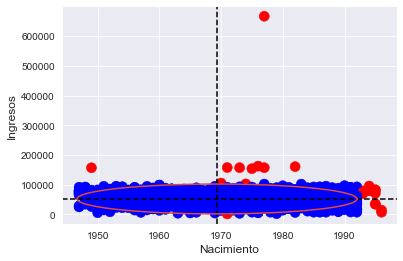

In [25]:
# Revisamos
# =====================================================================================================
ingreso = df['ingresos']
media = (ingreso).mean()
std_x = (ingreso).std()*2
edades = df['nacimiento']
media_y = (edades).mean()
std_y = (edades).std()*2

colors = ['blue']*len(ingreso)
for index, x in enumerate(ingreso):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(edades, ingreso, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.xlabel('Nacimiento')
plt.ylabel('Ingresos')
sns.set_style('darkgrid')
plt.show()

In [26]:
df.drop(df[df['ingresos'] > 150000].index, inplace=True)
df.drop(df[df['ingresos'] < 8000].index, inplace=True)

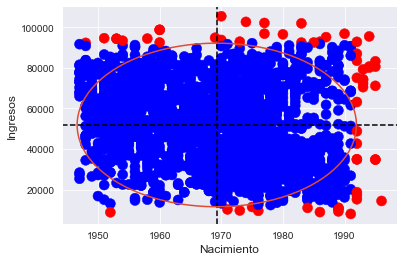

In [27]:
# Volvemos a revisar
# =====================================================================================================
ingreso = df['ingresos']
media = (ingreso).mean()
std_x = (ingreso).std()*2
edades = df['nacimiento']
media_y = (edades).mean()
std_y = (edades).std()*2

colors = ['blue']*len(ingreso)
for index, x in enumerate(ingreso):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(edades, ingreso, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.xlabel('Nacimiento')
plt.ylabel('Ingresos')
sns.set_style('darkgrid')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nacimiento           2166 non-null   int64  
 1   educación            2166 non-null   object 
 2   estado_civil         2166 non-null   object 
 3   ingresos             2166 non-null   float64
 4   hogar_infantil       2166 non-null   int64  
 5   hogar_adolescente    2166 non-null   int64  
 6   fecha_afiliado       2166 non-null   object 
 7   recencia             2166 non-null   int64  
 8   Mnt_Vinos            2166 non-null   int64  
 9   Mnt_Frutas           2166 non-null   int64  
 10  Mnt_Carnes           2166 non-null   int64  
 11  Mnt_Pescado          2166 non-null   int64  
 12  Mnt_Dulces           2166 non-null   int64  
 13  Compra_ofertas       2166 non-null   int64  
 14  Compra_web           2166 non-null   int64  
 15  Compra_catálogo      2166 non-null   i

In [29]:
df.head(6)

,nacimiento,educación,estado_civil,ingresos,hogar_infantil,hogar_adolescente,fecha_afiliado,recencia,Mnt_Vinos,Mnt_Frutas,...,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual,respuestas,quejas,edad
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,1,4,4,6,1,1,0,52
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,1,7,3,7,5,1,0,61
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,1,3,2,5,2,0,0,64
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,1,1,0,2,7,0,0,55
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,2,3,1,2,7,1,0,33
5,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,...,240,32,1,4,7,5,2,1,0,64


In [30]:
df_a1 = df
df_a1

,nacimiento,educación,estado_civil,ingresos,hogar_infantil,hogar_adolescente,fecha_afiliado,recencia,Mnt_Vinos,Mnt_Frutas,...,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual,respuestas,quejas,edad
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,1,4,4,6,1,1,0,52
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,1,7,3,7,5,1,0,61
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,1,3,2,5,2,0,0,64
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,1,1,0,2,7,0,0,55
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,2,3,1,2,7,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,...,47,48,2,5,2,11,4,0,0,46
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,3,8,1,1,0,3,8,0,0,45
2237,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,...,15,5,2,6,1,5,8,0,0,46
2238,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,...,149,165,1,5,4,10,3,0,0,44


In [31]:
df_a1['educación'] = df_a1['educación'].replace("2nd Cycle", "Master")

In [32]:
df_a1['estado_civil'] = df_a1['estado_civil'].replace(["YOLO", "Alone", "Absurd"], "Single")
df_a1['estado_civil'] = df_a1['estado_civil'].replace(["Together"], "Married")

In [35]:
# Diseccionamos nuestro dataframe
num_df_a1 = df_a1.drop(columns=['educación', 'estado_civil', 'hogar_infantil', 'hogar_adolescente', 'fecha_afiliado', 'respuestas', 'quejas', 'edad'])
obj_df_a1 = df_a1.loc[:, ['educación', 'estado_civil']]
bin_df_a1 = df_a1.loc[:, ['hogar_infantil', 'hogar_adolescente', 'respuestas']]
label = df_a1['quejas']

In [36]:
print('num_df_a1:', num_df_a1.shape)
print('obj_df_a1:', obj_df_a1.shape)
print('bin_df_a1:', bin_df_a1.shape)
print('label_a1:', label.shape)

num_df_a1: (2166, 13)
obj_df_a1: (2166, 2)
bin_df_a1: (2166, 3)
label_a1: (2166,)


In [37]:
num_df_a1.head()

,nacimiento,ingresos,recencia,Mnt_Vinos,Mnt_Frutas,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual
0,1970,84835.0,0,189,104,379,111,189,1,4,4,6,1
1,1961,57091.0,0,464,5,64,7,0,1,7,3,7,5
2,1958,67267.0,0,134,11,59,15,2,1,3,2,5,2
3,1967,32474.0,0,10,0,1,0,0,1,1,0,2,7
4,1989,21474.0,0,6,16,24,11,0,2,3,1,2,7


In [38]:
num_df_a1.describe()

,nacimiento,ingresos,recencia,Mnt_Vinos,Mnt_Frutas,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,1969.267775,51883.819483,49.228532,304.311634,26.269621,164.504155,37.296399,27.093721,2.321791,4.071099,2.620960,5.825946,5.308403
std,11.331346,20161.090663,28.902463,335.843382,39.654353,216.993391,54.344134,41.138789,1.842118,2.667662,2.741673,3.208489,2.294887
min,1947.000000,8028.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,35691.250000,25.000000,24.000000,1.250000,16.000000,3.000000,1.000000,1.000000,2.000000,0.000000,3.000000,4.000000
50%,1970.000000,51650.500000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1978.000000,68118.000000,74.000000,502.750000,33.000000,230.000000,49.000000,33.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,105471.000000,99.000000,1493.000000,199.000000,1607.000000,259.000000,263.000000,15.000000,27.000000,11.000000,13.000000,19.000000


In [39]:
obj_df_a1.describe()

,educación,estado_civil
count,2166,2166
unique,5,4
top,Graduation,Married
freq,1103,1396


In [40]:
bin_df_a1.describe()

,hogar_infantil,hogar_adolescente,respuestas
count,2166.000000,2166.000000,2166.000000
mean,0.450139,0.516620,0.149123
std,0.538630,0.544933,0.356292
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


In [41]:
label.describe()

count    2166.000000
mean        0.008772
std         0.093268
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quejas, dtype: float64

In [42]:
# Utilizaremos SciPy para sacar la distribución normal estandarizada
from scipy.stats import zscore

In [43]:
z_df = zscore(num_df_a1)
z_df.head()

,nacimiento,ingresos,recencia,Mnt_Vinos,Mnt_Frutas,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,Compra_catálogo,Compra_tienda,Visitas_web_mensual
0,0.064634,1.634772,-1.703658,-0.343429,1.960651,0.988718,1.356552,3.936520,-0.717704,-0.026658,0.503108,0.054260,-1.877825
1,-0.729806,0.258338,-1.703658,0.475594,-0.536499,-0.463274,-0.557620,-0.658745,-0.717704,1.098182,0.138283,0.366005,-0.134418
2,-0.994619,0.763190,-1.703658,-0.507233,-0.385157,-0.486321,-0.410376,-0.610118,-0.717704,-0.401605,-0.226542,-0.257485,-1.441974
3,-0.200179,-0.962959,-1.703658,-0.876538,-0.662618,-0.753672,-0.686459,-0.658745,-0.717704,-1.151498,-0.956192,-1.192720,0.737286
4,1.741786,-1.508690,-1.703658,-0.888451,-0.259038,-0.647654,-0.483998,-0.658745,-0.174726,-0.401605,-0.591367,-1.192720,0.737286


In [44]:
onehot_df = pd.get_dummies(obj_df_a1)
onehot_df.head()

,educación_2n Cycle,educación_Basic,educación_Graduation,educación_Master,educación_PhD,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,estado_civil_Widow
0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0


In [45]:
features = pd.concat([z_df, bin_df_a1, onehot_df], axis=1)
features.head()

,nacimiento,ingresos,recencia,Mnt_Vinos,Mnt_Frutas,Mnt_Carnes,Mnt_Pescado,Mnt_Dulces,Compra_ofertas,Compra_web,...,respuestas,educación_2n Cycle,educación_Basic,educación_Graduation,educación_Master,educación_PhD,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,estado_civil_Widow
0,0.064634,1.634772,-1.703658,-0.343429,1.960651,0.988718,1.356552,3.936520,-0.717704,-0.026658,...,1,0,0,1,0,0,1,0,0,0
1,-0.729806,0.258338,-1.703658,0.475594,-0.536499,-0.463274,-0.557620,-0.658745,-0.717704,1.098182,...,1,0,0,1,0,0,0,0,1,0
2,-0.994619,0.763190,-1.703658,-0.507233,-0.385157,-0.486321,-0.410376,-0.610118,-0.717704,-0.401605,...,0,0,0,1,0,0,0,1,0,0
3,-0.200179,-0.962959,-1.703658,-0.876538,-0.662618,-0.753672,-0.686459,-0.658745,-0.717704,-1.151498,...,0,0,0,1,0,0,0,1,0,0
4,1.741786,-1.508690,-1.703658,-0.888451,-0.259038,-0.647654,-0.483998,-0.658745,-0.174726,-0.401605,...,1,0,0,1,0,0,0,0,1,0


In [46]:
# Librerías para el modelado
# =====================================================================================================
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [47]:
# 
# =====================================================================================================
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=101)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1732, 25)
(1732,)
(434, 25)
(434,)


In [49]:
# Creamos nuestro modelo
from tensorflow.python import metrics
from tensorflow.python.ops.math_ops import sigmoid

# =====================================================================================================
model = Sequential()
model.add(InputLayer(input_shape=(features.shape[1], ), name='input'))
model.add(Dense(units=8, activation='sigmoid', name='hidden2'))
model.add(Dense(units=1, activation='sigmoid', name='output'))

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics='accuracy')

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden2 (Dense)             (None, 8)                 208       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Entrenamiento
# =====================================================================================================
history = model.fit(x=x_train, 
          y=y_train, 
          batch_size=100,
          epochs=110,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/110
18/18 [==============================] - 2s 20ms/step - loss: 1.0778 - accuracy: 0.0208 - val_loss: 1.0252 - val_accuracy: 0.0253
Epoch 2/110
18/18 [==============================] - 0s 4ms/step - loss: 0.9763 - accuracy: 0.0329 - val_loss: 0.9314 - val_accuracy: 0.0438
Epoch 3/110
18/18 [==============================] - 0s 4ms/step - loss: 0.8864 - accuracy: 0.0814 - val_loss: 0.8476 - val_accuracy: 0.1198
Epoch 4/110
18/18 [==============================] - 0s 4ms/step - loss: 0.8070 - accuracy: 0.2119 - val_loss: 0.7736 - val_accuracy: 0.2765
Epoch 5/110
18/18 [==============================] - 0s 5ms/step - loss: 0.7363 - accuracy: 0.4215 - val_loss: 0.7077 - val_accuracy: 0.4977
Epoch 6/110
18/18 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.6201 - val_loss: 0.6490 - val_accuracy: 0.6959
Epoch 7/110
18/18 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.7581 - val_loss: 0.5963 - val_accuracy: 0.7949
Epoch 8/110


Epoch 59/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9913 - val_loss: 0.0765 - val_accuracy: 0.9908
Epoch 60/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9913 - val_loss: 0.0755 - val_accuracy: 0.9908
Epoch 61/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.9913 - val_loss: 0.0746 - val_accuracy: 0.9908
Epoch 62/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9913 - val_loss: 0.0738 - val_accuracy: 0.9908
Epoch 63/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0695 - accuracy: 0.9913 - val_loss: 0.0729 - val_accuracy: 0.9908
Epoch 64/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 0.9913 - val_loss: 0.0721 - val_accuracy: 0.9908
Epoch 65/110
18/18 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9913 - val_loss: 0.0714 - val_accuracy: 0.9908
Epoch 

In [52]:
# Colocamos en un dataframe nuestros resultados
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,1.077796,0.020785,1.025208,0.025346
1,0.976312,0.032910,0.931405,0.043779
2,0.886355,0.081409,0.847609,0.119816
3,0.807000,0.211894,0.773592,0.276498
4,0.736344,0.421478,0.707730,0.497696
...,...,...,...,...
105,0.052706,0.991340,0.057351,0.990783
106,0.052556,0.991340,0.057220,0.990783
107,0.052420,0.991340,0.057128,0.990783
108,0.052294,0.991340,0.057002,0.990783


In [53]:
# Para visualizar e interpretar nuestro dataframe más rápido
def visual(dataframe):
    dataframe = dataframe.astype(str) + '%'
    return dataframe

In [54]:
# Separamos las pérdidas y la convertimos a %
hist_loss = hist.loc[:, ['loss', 'val_loss']]
hist_loss = hist_loss*100
hist_loss = hist_loss.astype(int)
visual(hist_loss)

,loss,val_loss
0,107%,102%
1,97%,93%
2,88%,84%
3,80%,77%
4,73%,70%
...,...,...
105,5%,5%
106,5%,5%
107,5%,5%
108,5%,5%


In [55]:
# Separamos la exactitud
hist_acc = hist.loc[:, ['accuracy', 'val_accuracy']]
hist_acc = hist_acc*100
hist_acc = hist_acc.astype(int)
visual(hist_acc)

,accuracy,val_accuracy
0,2%,2%
1,3%,4%
2,8%,11%
3,21%,27%
4,42%,49%
...,...,...
105,99%,99%
106,99%,99%
107,99%,99%
108,99%,99%


In [56]:
def plot_loss(history_loss):
    plt.figure()
    plt.title('Pérdida')
    plt.plot(history_loss)
    plt.xlabel("Ciclos (Epoch)")
    plt.ylabel("Valor (%)")
    plt.legend(['loss', 'val_loss'])
    plt.tight_layout()
    plt.show()

In [57]:
def plot_acc(history_acc):
    plt.figure()
    plt.title('Exactitud')
    plt.plot(history_acc)
    plt.xlabel("Ciclos (Epoch)")
    plt.ylabel("Valor (%)")
    plt.legend(['accuracy', 'val_accuracy'])
    plt.tight_layout()
    plt.show()

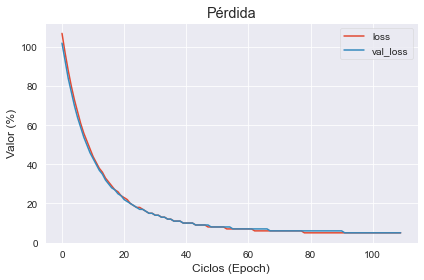

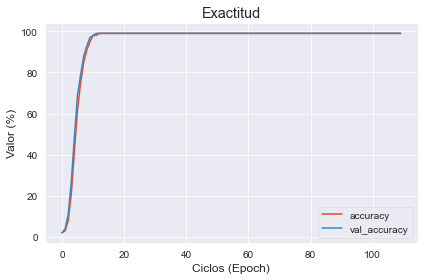

In [58]:
plot_loss(hist_loss)
plot_acc(hist_acc)

In [59]:

y_pred = model.predict(x_test)
y_pred = np.around(y_pred)

14/14 [==============================] - 0s 1ms/step


In [60]:
def matriz(confusion):
    sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.1%', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel("Predicción")
    plt.ylabel("Actual")
    plt.show()

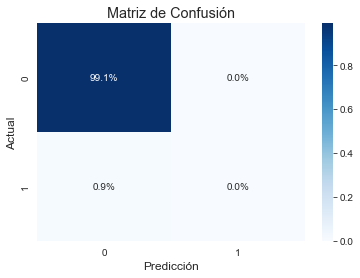

In [61]:
confusion = confusion_matrix(y_test, y_pred)
matriz(confusion)